In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib as plt

survey_data = pd.read_csv("data.csv")

survey_data = survey_data.drop(survey_data.columns[:18], axis=1)
survey_data = survey_data.drop(1)

survey_data = survey_data.replace({"Very Unamusing/Offensive":1, "Unamusing/Offensive":2, "Slightly Unamusing/Offensive":3, "Neutral":4, "Slightly Funny":5, "Funny":6, "Very Funny":7})
survey_data = survey_data.replace({"22":"2001", "95":"1995", "99":"1999"})

survey_data = survey_data.apply(pd.to_numeric, errors="ignore")
survey_data.iat[0,0]='Once you start living here, you can tell the difference between the different types of Americans - the different energies from East Coast to West Coast. Like East Coast Americans, super intense. West Coast, everyone calms the fuck down a bit.'
survey_data = survey_data.drop(8)

survey_data.iloc[1] = survey_data.columns
survey_data.columns = survey_data.iloc[0] 
survey_data = survey_data.drop(0)

survey_data.reset_index(drop=True, inplace=True)

def replace_labels(string):
    if type(string) == str:
        if "Original Swearing" in string:
            return "Original Swearing"
        elif "Original No Swearing" in string:
            return "Original No Swearing"
        elif "Removed" in string:
            return "Swearing Removed" 
        elif "Added" in string:
            return "Swearing Added"
        else:
            return string 
    else: 
        return string 

survey_data = survey_data.map(replace_labels)
survey_data

,"Once you start living here, you can tell the difference between the different types of Americans - the different energies from East Coast to West Coast. Like East Coast Americans, super intense. West Coast, everyone calms the fuck down a bit.","Once you start living here, you can tell the difference between the different types of Americans - the different energies from East Coast to West Coast. Like East Coast Americans, super intense. West Coast, everyone calms down a bit.","America is like ‘let’s take everything we have and create this miracle mRNA vaccine in under a year, and we did it! It fucking works! And fuck you we’re not gonna take it. Oh you want it? Well fuck that we’re not gonna give it to you!","America is like ‘let’s take everything we have and create this miracle mRNA vaccine in under a year, and we did it! It works! And we’re not gonna take it. Oh you want it? Well we’re not gonna give it to you!",I love my wife so much I married her three times. Why? Because when you have Asian parents you have to get married in every fucking country you have relatives in.,I love my wife so much I married her three times. Why? Because when you have Asian parents you have to get married in every country you have relatives in.,"Whenever I bring up another country to my American friends, they will bring up the one fact they read one time on the back of a Snapple cap, and they try to use it to paint the entire history of your civilization with whatever half remembered back of the brainstem regurgitated fact.","Whenever I bring up another country to my American friends, they will bring up the one fucking fact they read one time on the back of a Snapple cap, and they try to use it to paint the entire history of your civilization with whatever half remembered back of the brainstem regurgitated fact.","This beautiful American landscape that we inherited - well actually we stole from the Mexicans and the Indians - it looked pretty good, it was pristine, paradise. Only a nation of unenlightened half-wits could’ve taken this beautiful place and turned it into what it is today: a shopping mall. A big fucking shopping mall.","This beautiful American landscape that we inherited - well actually we stole from the Mexicans and the Indians - it looked pretty good, it was pristine, paradise. Only a nation of unenlightened half-wits could’ve taken this beautiful place and turned it into what it is today: a shopping mall. A big shopping mall.",...,"We like war because we’re good at it, and you know why we’re good at it? Because we get a lot of practice. This country is only 200 years old and we’ve already had 10 major wars. We average a major war every 20 years in this country so we’re good at it. And it’s a good thing we are, we’re not very good at anything else anymore. Can’t build a decent car, can’t make a tv set or a VCR worth a fuck, got no steel industry left, can’t educate our young people, can’t get healthcare to our old people, but we can bomb the shit out of your country alright.","We like war because we’re good at it, and you know why we’re good at it? Because we get a lot of practice. This country is only 200 years old and we’ve already had 10 major wars. We average a major war every 20 years in this country so we’re good at it. And it’s a good thing we are, we’re not very good at anything else anymore. Can’t build a decent car, can’t make a tv set or a VCR worth anything, got no steel industry left, can't educate our young people, can't get healthcare to our old people, but we can bomb your country alright.","Religion has convinced people that there’s an invisible man living in the sky who watches everything you do every minute of every day, and the invisible man has a list of 10 specific things he doesn’t want you to do, and if you do any of these things he will send you to a special place of burning and fire and smoke and torture and anguish for you to live forever and suffer and burn and scream until the end of time. But he love

In [4]:
average_df = pd.DataFrame(survey_data[1:].mean())
average_df["Version"] = survey_data.iloc[0]
average_df.rename(columns={0:"Average"}, inplace=True)

average_df

,Average,Version
0,,
"Once you start living here, you can tell the difference between the different types of Americans - the different energies from East Coast to West Coast. Like East Coast Americans, super intense. West Coast, everyone calms the fuck down a bit.",4.333333,Original Swearing
"Once you start living here, you can tell the difference between the different types of Americans - the different energies from East Coast to West Coast. Like East Coast Americans, super intense. West Coast, everyone calms down a bit.",3.285714,Swearing Removed
"America is like ‘let’s take everything we have and create this miracle mRNA vaccine in under a year, and we did it! It fucking works! And fuck you we’re not gonna take it. Oh you want it? Well fuck that we’re not gonna give it to you!",4.0,Original No Swearing
"America is like ‘let’s take everything we have and create this miracle mRNA vaccine in under a year, and we did it! It works! And we’re not gonna take it. Oh you want it? Well we’re not gonna give it to you!",4.0,Swearing Removed
I love my wife so much I married her three times. Why? Because when you have Asian parents you have to get married in every fucking country you have relatives in.,4.5,Original Swearing
I love my wife so much I married her three times. Why? Because when you have Asian parents you have to get married in every country you have relatives in.,3.833333,Swearing Removed
"Whenever I bring up another country to my American friends, they will bring up the one fact they read one time on the back of a Snapple cap, and they try to use it to paint the entire history of your civilization with whatever half remembered back of the brainstem regurgitated fact.",3.833333,Original No Swearing
"Whenever I bring up another country to my American friends, they will bring up the one fucking fact they read one time on the back of a Snapple cap, and they try to use it to paint the entire history of your civilization with whatever half remembered back of the brainstem regurgitated fact.",4.25,Swearing Added
"This beautiful American landscape that we inherited - well actually we stole from the Mexicans and the Indians - it looked pretty good, it was pristine, paradise. Only a nation of unenlightened half-wits could’ve taken this beautiful place and turned it into what it is today: a shopping mall. A big fucking shopping mall.",5.6,Original Swearing


In [7]:
average_df.groupby(["Version"]).mean()

,Average
Version,
Original No Swearing,3.948016
Original Swearing,4.386667
Swearing Added,4.05381
Swearing Removed,4.386508


[Text(0.5, 1.0, 'Average Joke Rating by Joke Type')]

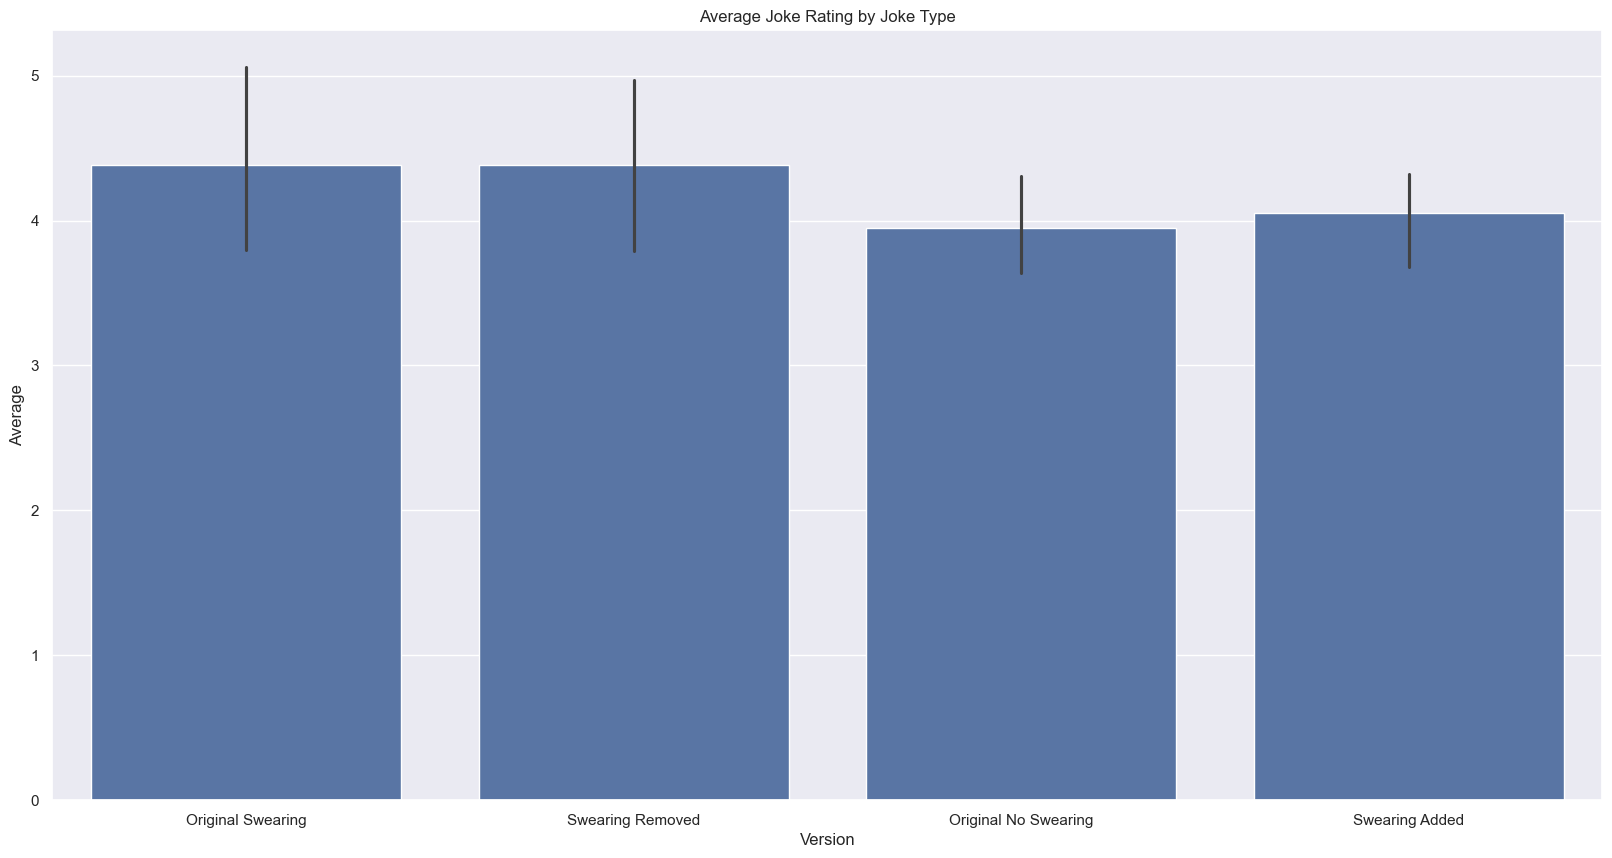

In [6]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(average_df, x="Version", y="Average").set(title="Average Joke Rating by Joke Type")